In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Color map of bar plot in animation
colors = dict(zip(
    ["Trivandrum","Kollam","Pathanamthitta","Alappuzha","Idukki","Ernakulam","Thrissur",
     "Palakkad","Malappuram","Kozhikkode","Wayanad","Kannur","Kasaragod", "Kottayam"],      
    ["#adb0ff", "#05696b", "#fcc006", "#b0dd16", "#aafbff", "#f7bb5f", "#eafb50", 
     "#8e82fe", "#cea2fd", "#89fe05", "#c0fb2d", "#04d8b2", "#f97306", "#95d0fc"]
))


In [3]:
def draw_barchart_sum(num, Figure_name, title):
    data = {'District':data1.iloc[:,0], 'Counts':data1.iloc[:,1], }
    data = pd.DataFrame(data)
    n=1

    for column in range(num):
        #print(data1.iloc[:, 1:column+2].sum(axis=1))
        data['Counts']=data1.iloc[:, 1:column+2].sum(axis=1)
        #data = data.sort_values(by='Counts', ascending=True)
        
        #dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
        
        fig, ax = plt.subplots(figsize = (15,6)) 
        ax.barh(data.iloc[:,0], data.iloc[:,1], color=[colors[x] for x in data['District']])
        
        dx = data['Counts'].max() / 200
        for i, (value, name) in enumerate(zip(data['Counts'], data['District'])):
            #print(i, value, name)
            #ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
            #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
            ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
            
        ax.text(1, 0.4, data1.columns[column+1].strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
        ax.text(1, 0.2, int(data['Counts'].sum()), transform=ax.transAxes, color='#777777', size=44, ha='right', weight=800)
        ax.text(0.73, 0.2, 'Total:', transform=ax.transAxes, size=44, color='#777777')
        ax.text(0.01, 1.01, 'Counts', transform=ax.transAxes, size=20, color='#777777')
        ax.set_xlim(0, None)
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#777777', labelsize=12)
        #ax.set_yticks([])

        ax.margins(0, 0.03)
        ax.grid(which='major', axis='x', linestyle='-')
        ax.set_axisbelow(True)
        ax.text(0, 1.15, title,
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
        ax.text(1, 0, 'Source : Kerala.gov.in , Twitter: @sujithmss',size=20, transform=ax.transAxes, color='#777777', ha='right',
                bbox=dict(facecolor='white', alpha=2.2, edgecolor='white'))
        plt.box(False)
        
        fig = ax.get_figure()
        fig.savefig(Figure_name+ str(n) +".JPEG")
        n=n+1

In [4]:
# Plot the Positive Cases 
data1 = pd.read_excel('Corona_kerala_v2.xlsx', sheet_name='PositveCases')
data1.fillna(0,inplace=True)
del data1['sum']
group_lk = data1['District'].to_dict()
data1.head()

,District,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,...,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-10 00:00:00,2020-04-11 00:00:00,2020-04-12 00:00:00
0,Kasaragod,1,0,0,0,0,0,0,1,0,...,7,6,1,9,4,1,4,3,2,0
1,Kannur,0,0,0,1,0,0,0,0,0,...,1,0,1,0,2,4,4,2,7,1
2,Trivandrum,0,0,0,0,3,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Kollam,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,Pathanamthitta,5,4,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


<BarContainer object of 14 artists>

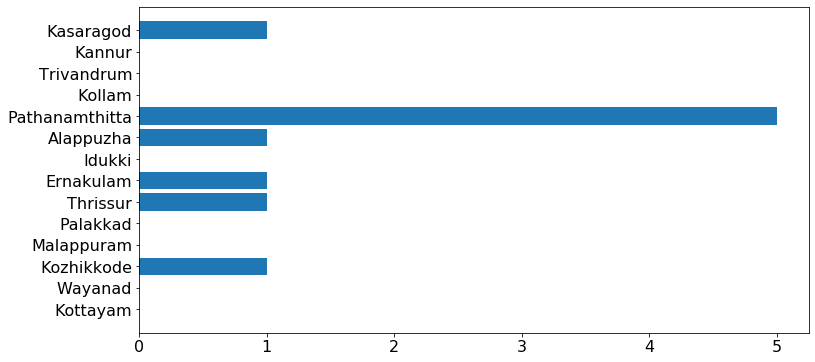

In [5]:
# Use this if you want to visualize one chart
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (12,6)) 
data1 = data1[::-1] 
ax.barh(data1.iloc[:,0], data1.iloc[:,1])

In [6]:
#draw_barchart_sum(len(data1.columns)-1, 'Figure_positive', 'Covid-19 reported cases in Kerala March 9, to April 12')
# len(data1.columns)-1


# fig, ax = plt.subplots(figsize=(15, 8))
# animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 5))
# HTML(animator.to_jshtml())
# # animator.to_html5_video() 
# # animator.save()

In [7]:
# Plot the Recovered Cases 
data1 = pd.read_excel('Corona_kerala_v2.xlsx', sheet_name='Recovered')
data1.fillna(0,inplace=True)
del data1['sum']
data1.head()

,District,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,...,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-10 00:00:00,2020-04-11 00:00:00,2020-04-12 00:00:00
0,Kasaragod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,9.0,28.0
1,Kannur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,7.0,4.0,1.0,5.0,1.0,3.0,6.0,0.0,0.0
2,Trivandrum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0
3,Kollam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Pathanamthitta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 14 artists>

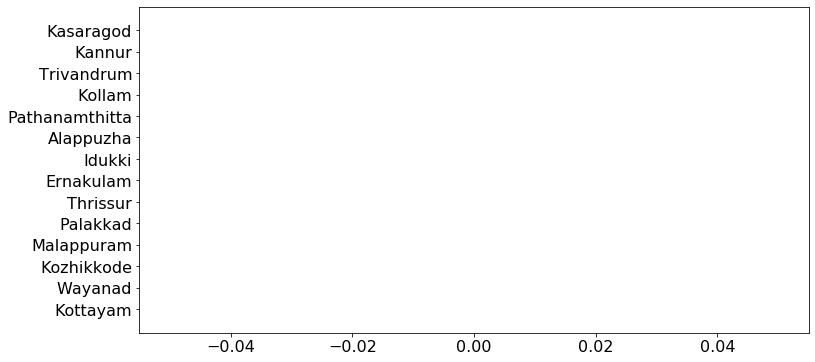

In [8]:
# Use this if you want to visualize one chart
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (12,6)) 
data1 = data1[::-1] 
ax.barh(data1.iloc[:,0], data1.iloc[:,1])

C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


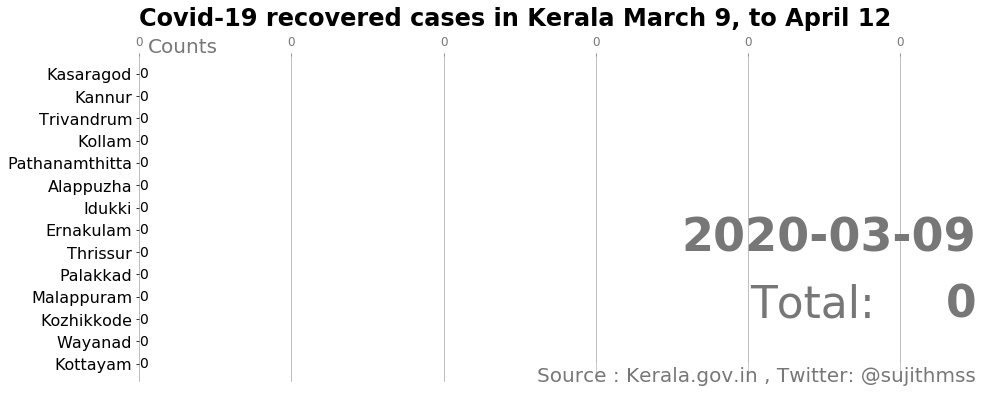

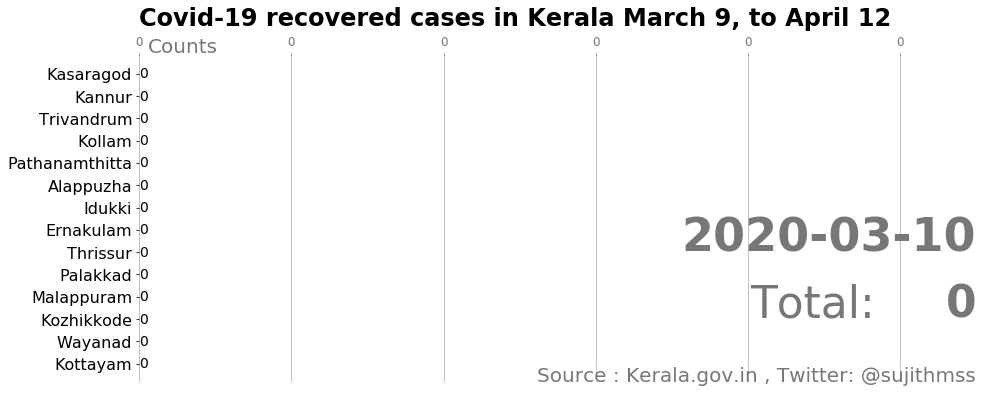

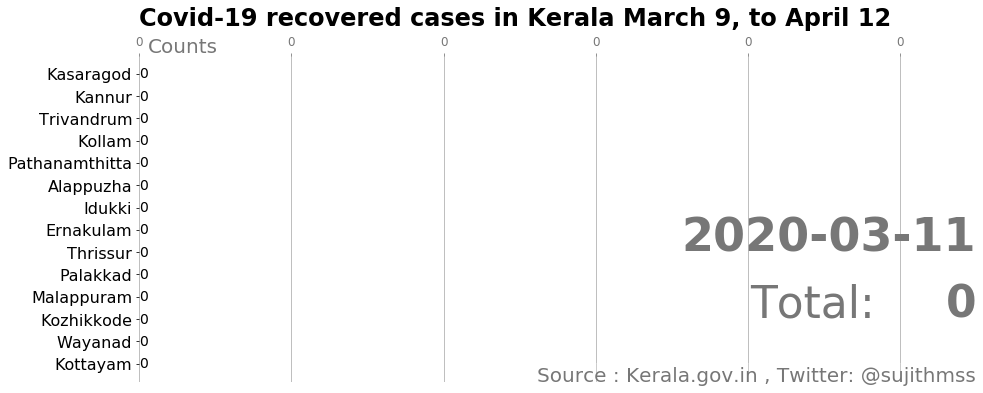

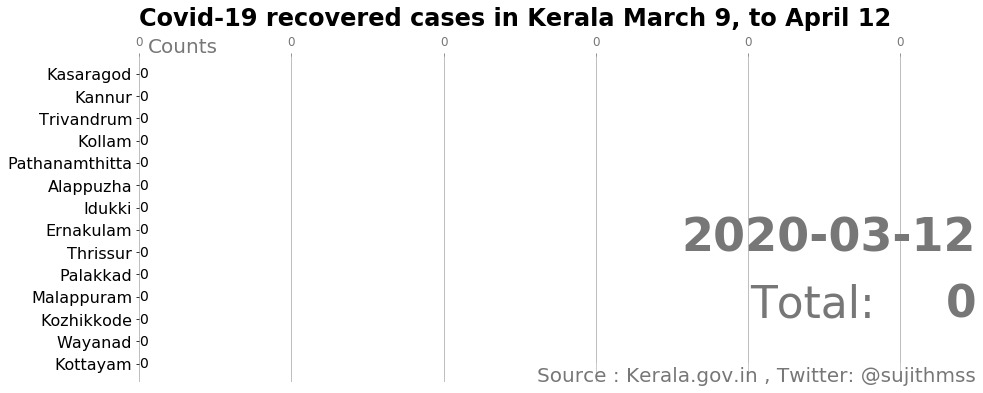

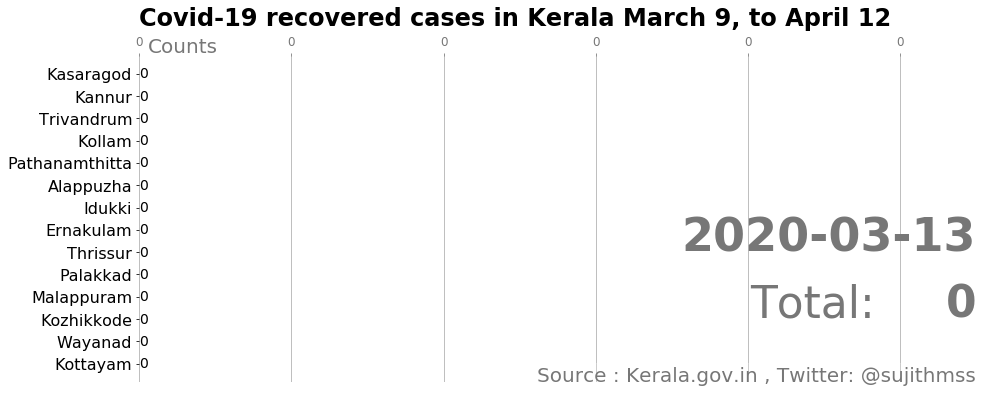

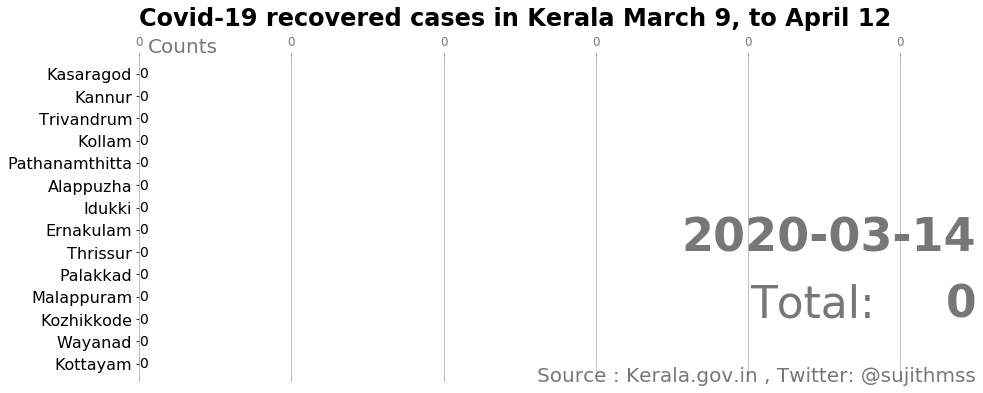

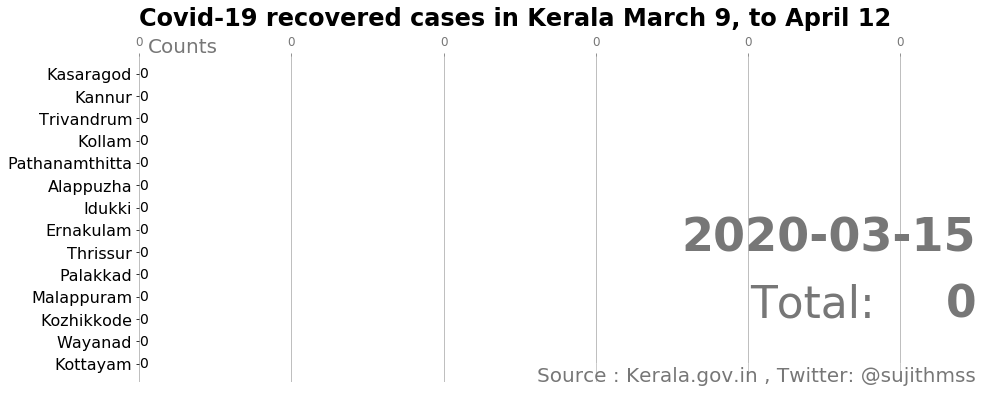

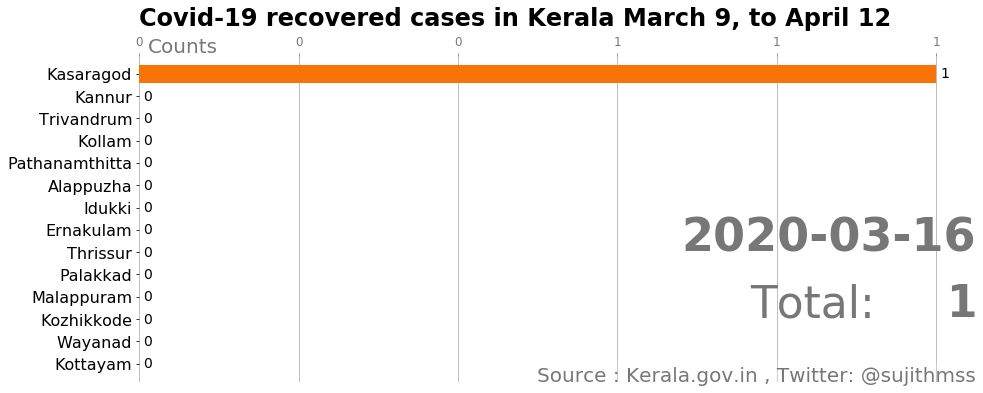

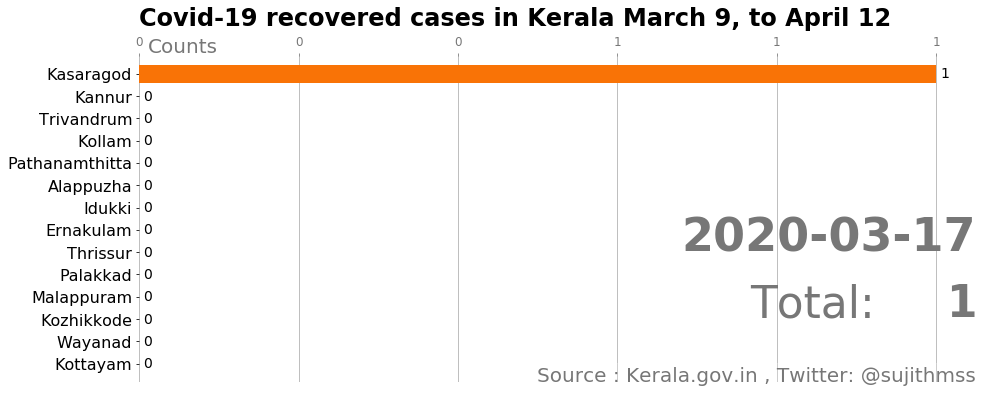

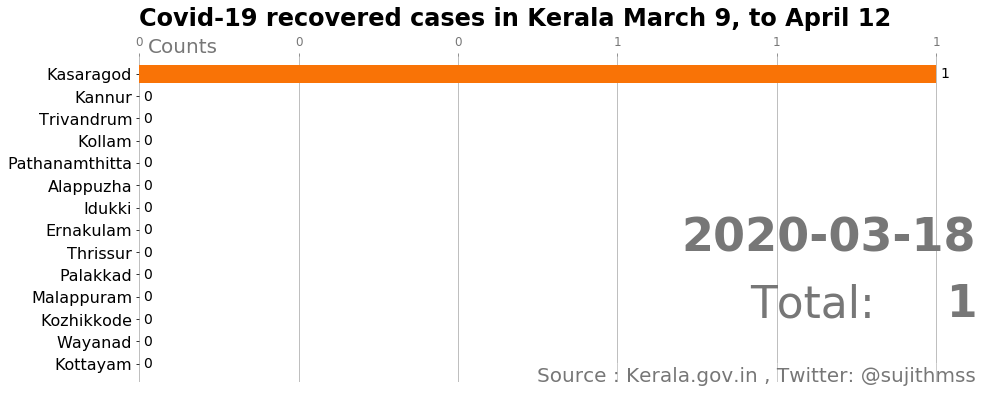

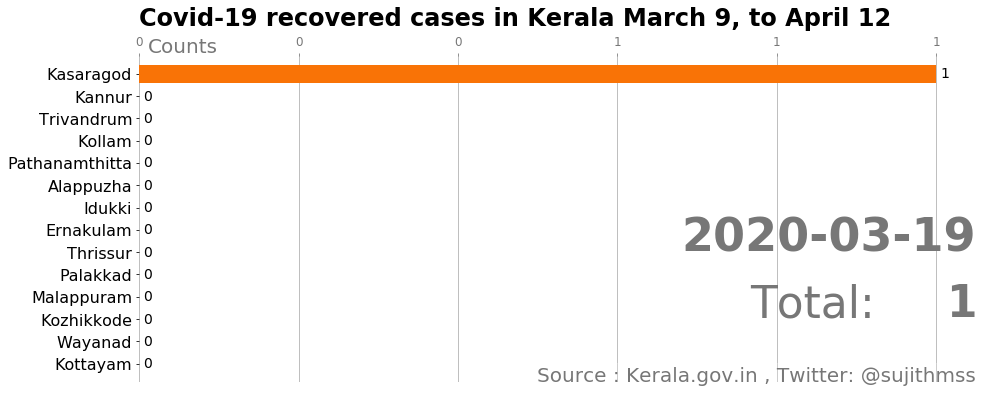

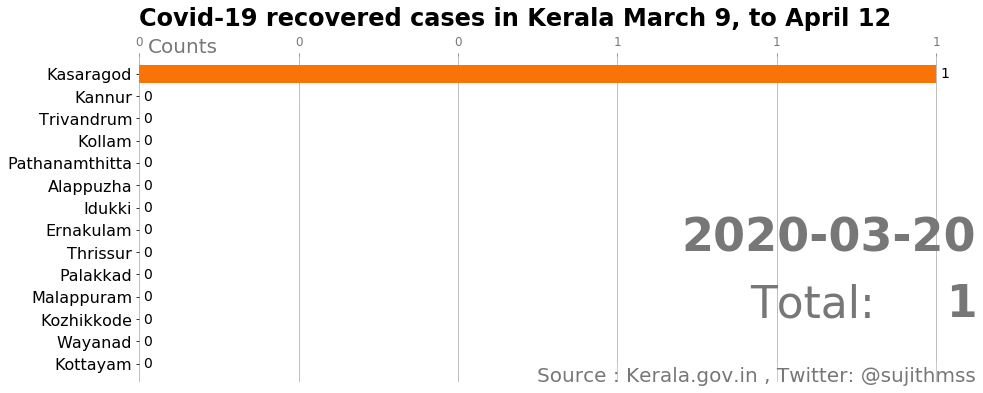

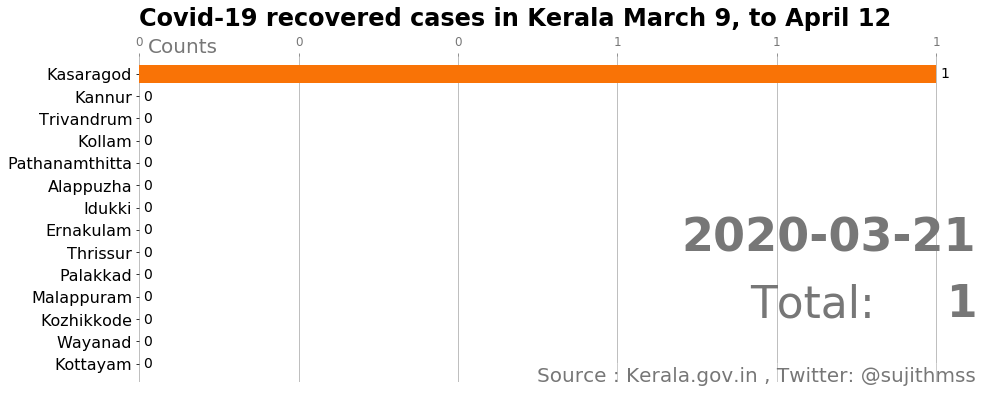

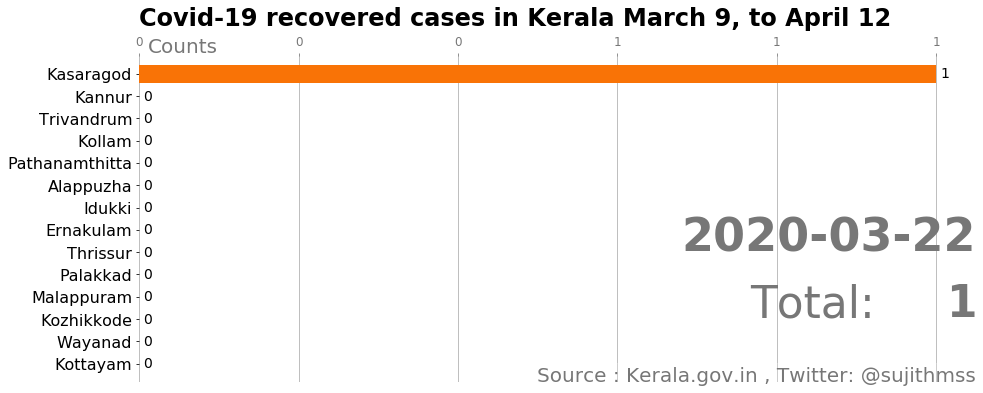

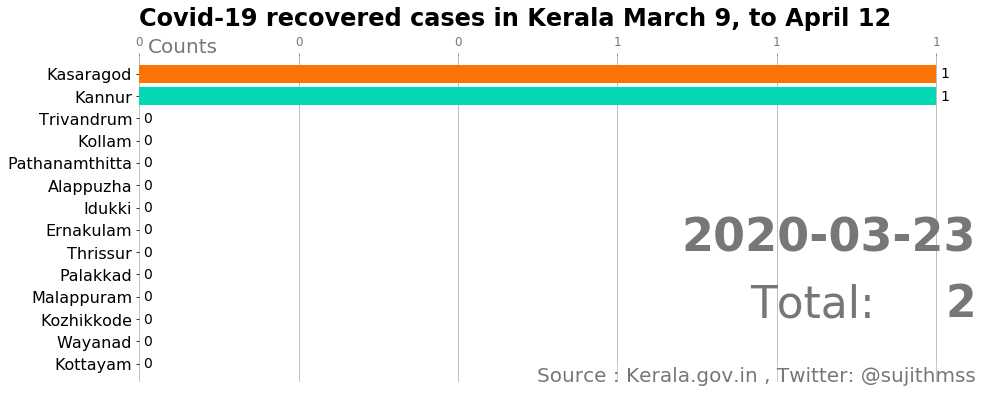

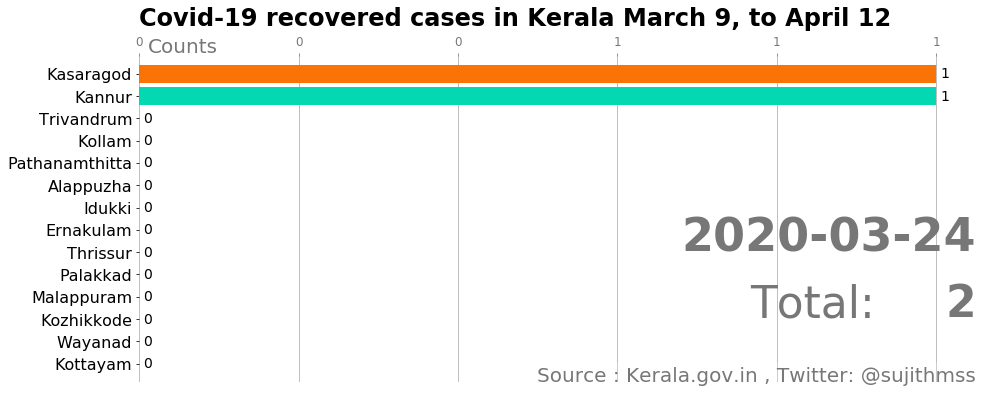

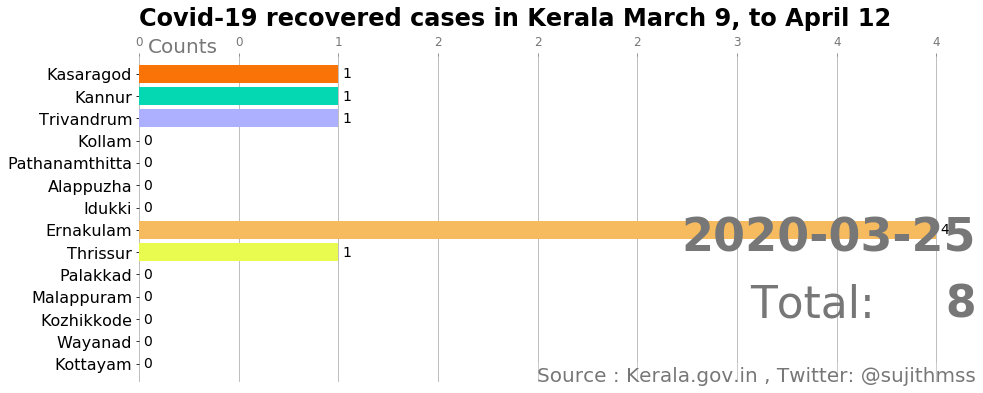

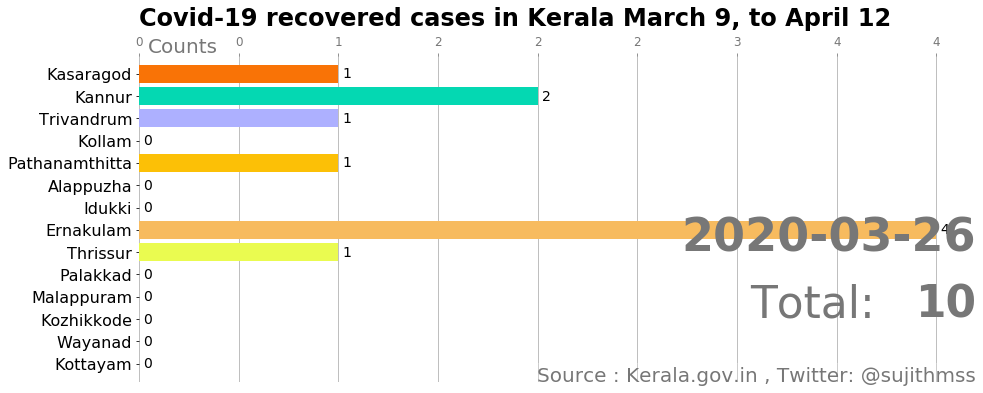

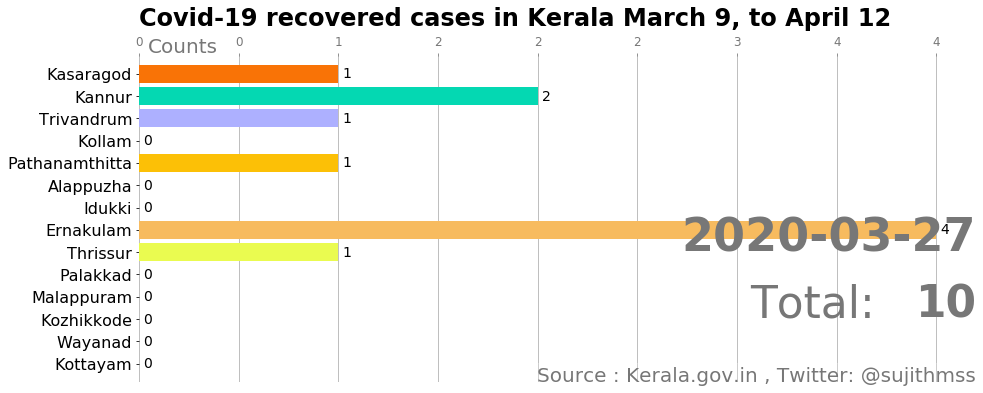

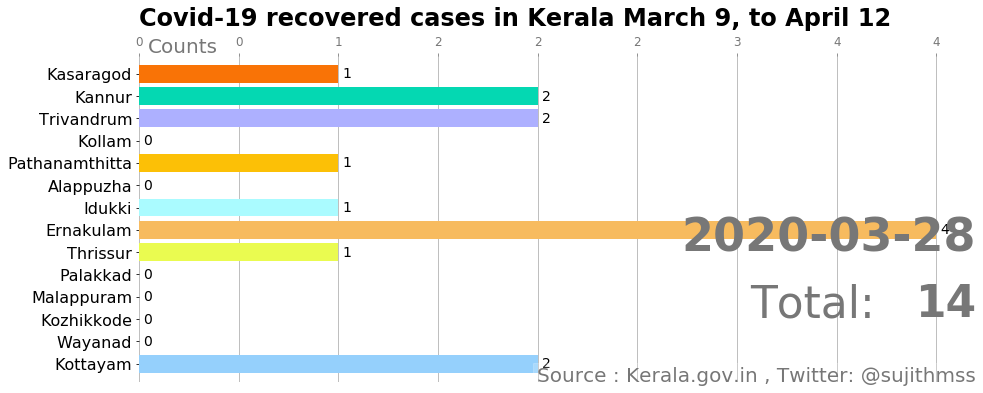

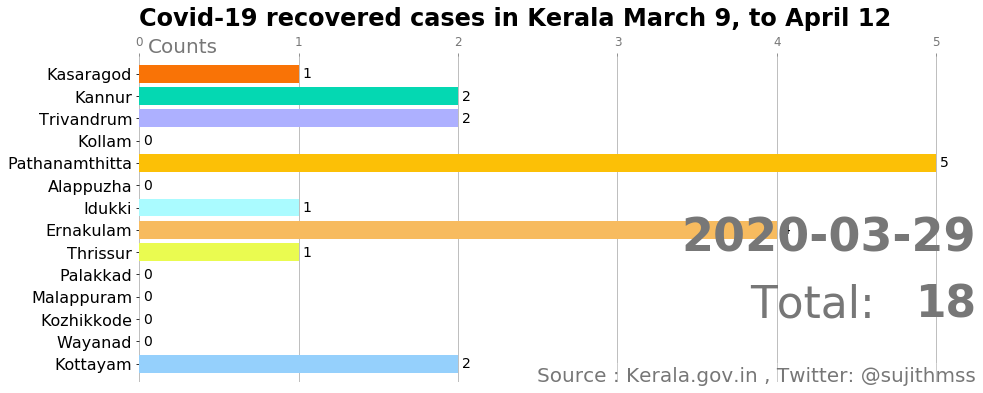

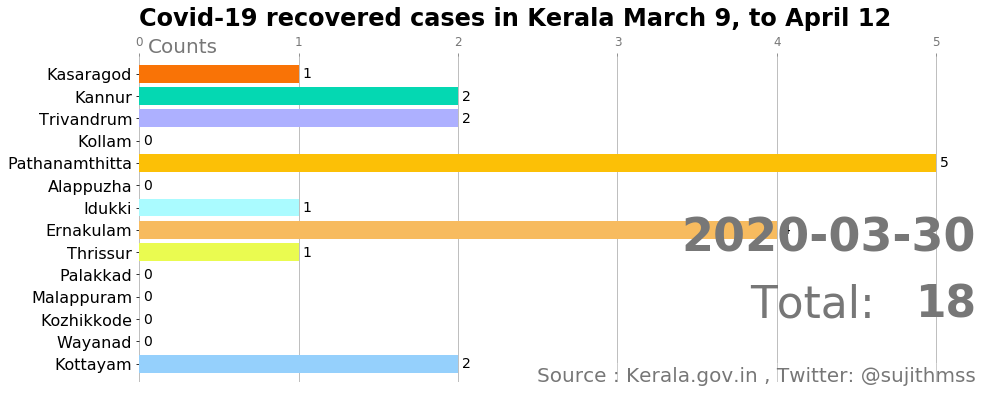

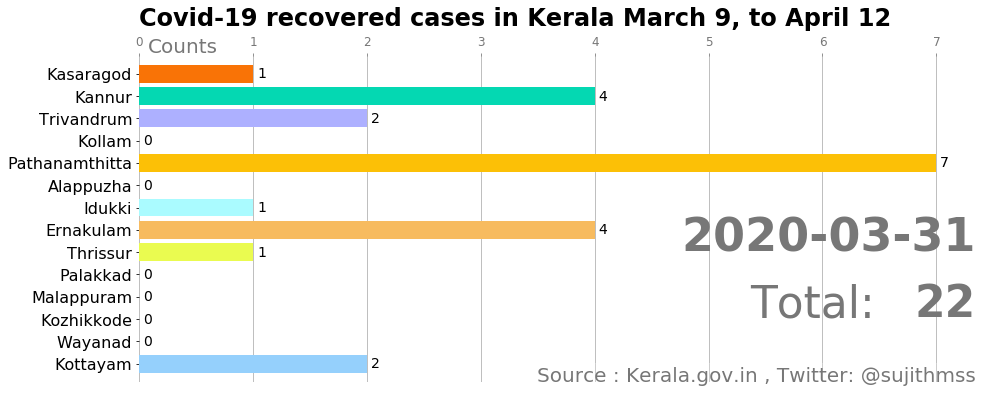

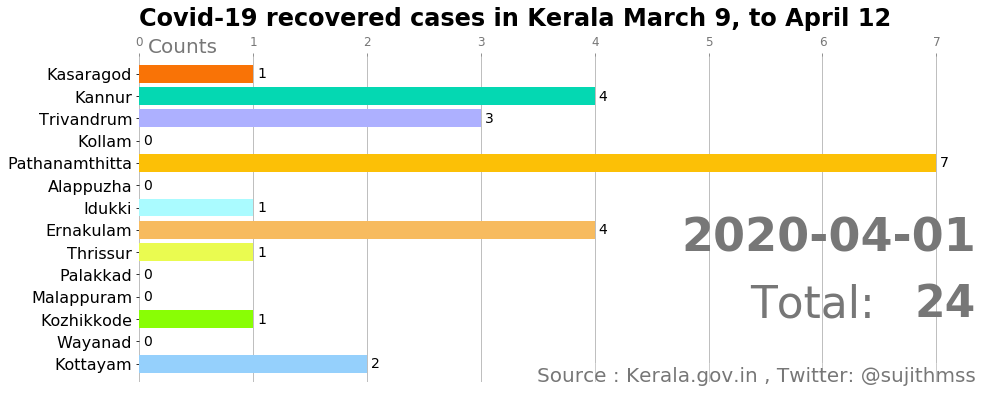

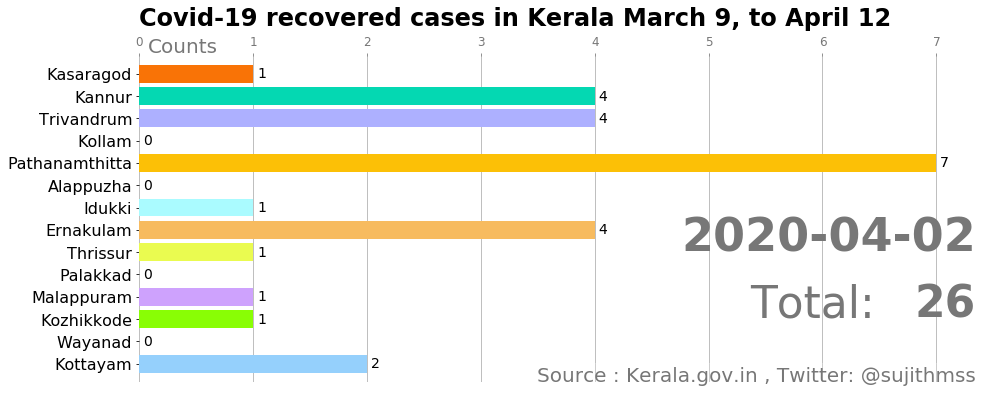

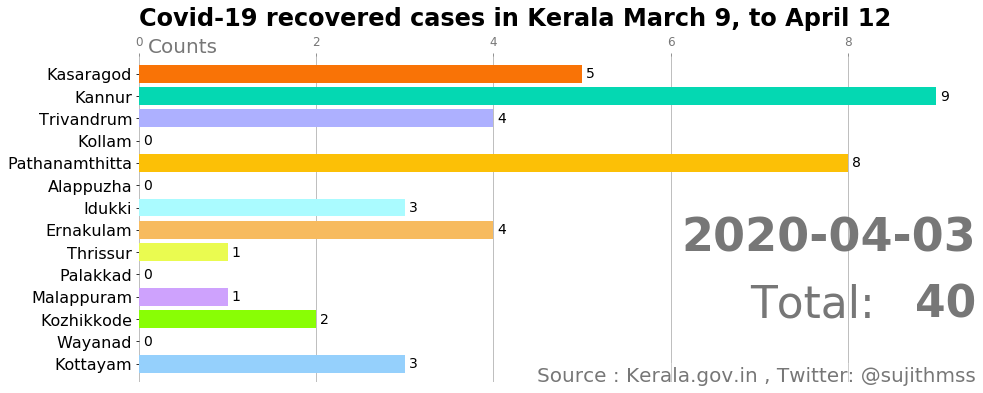

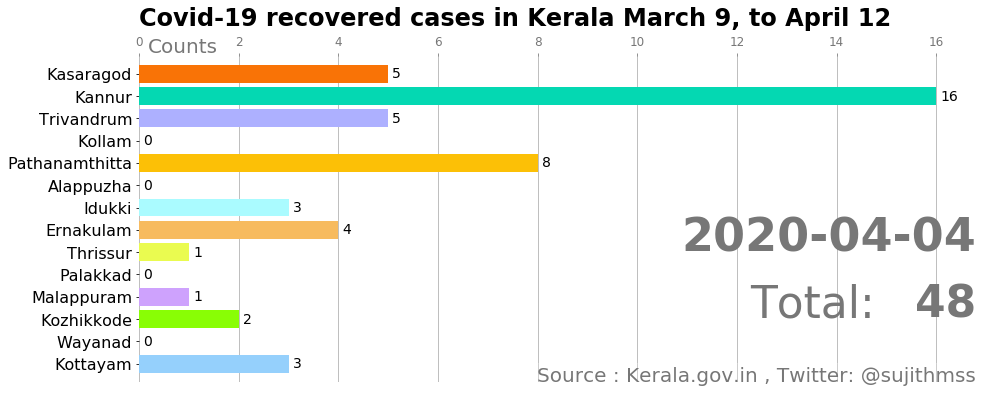

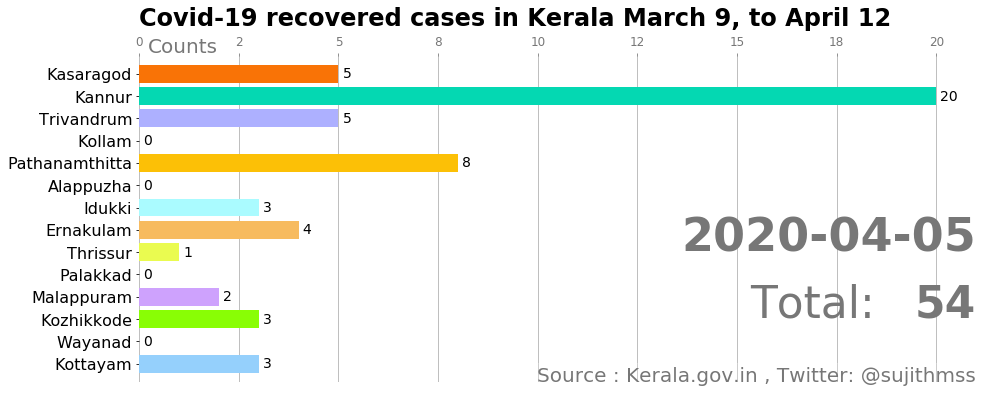

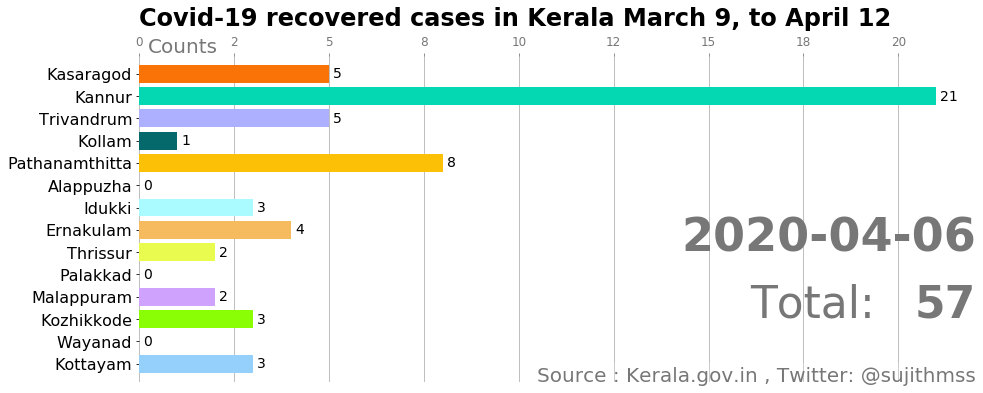

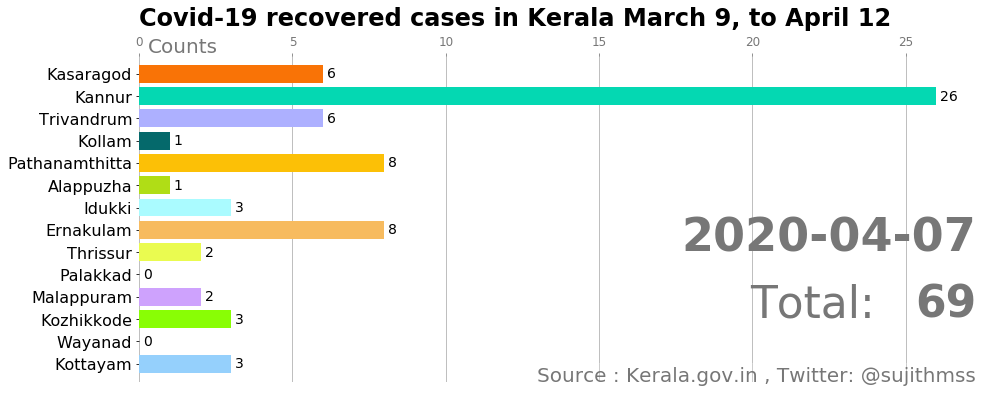

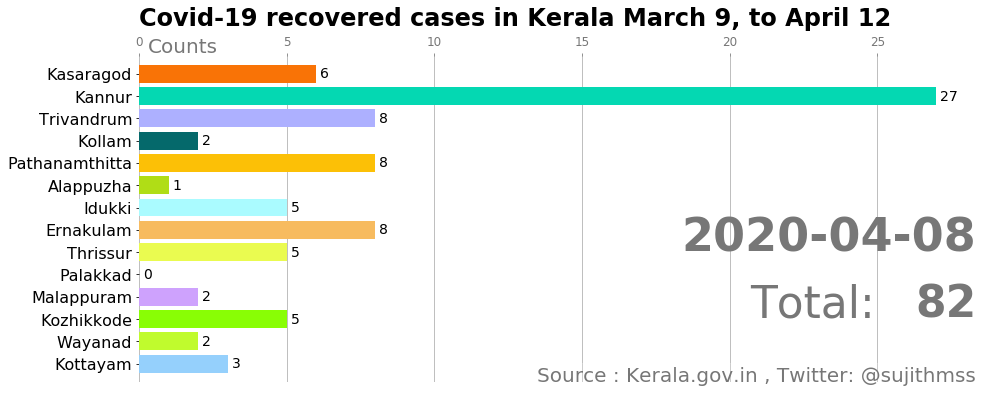

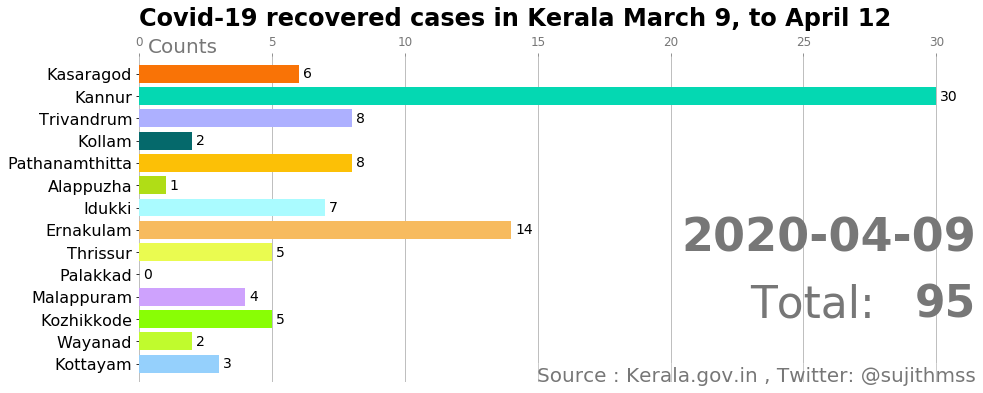

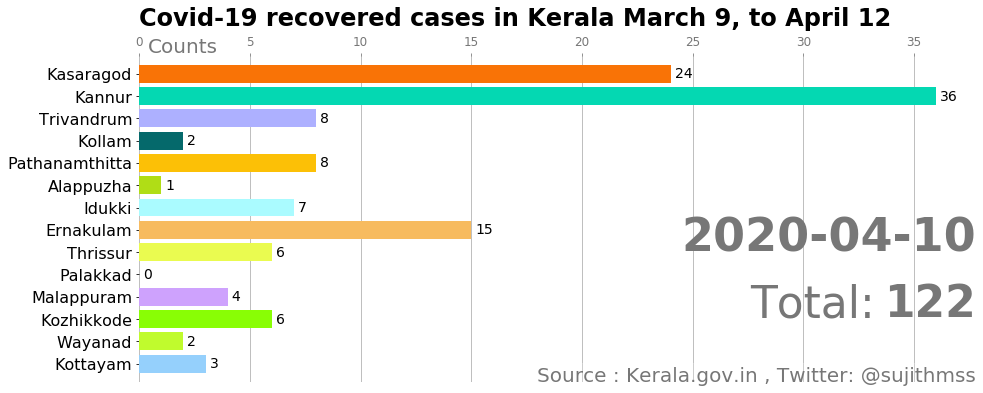

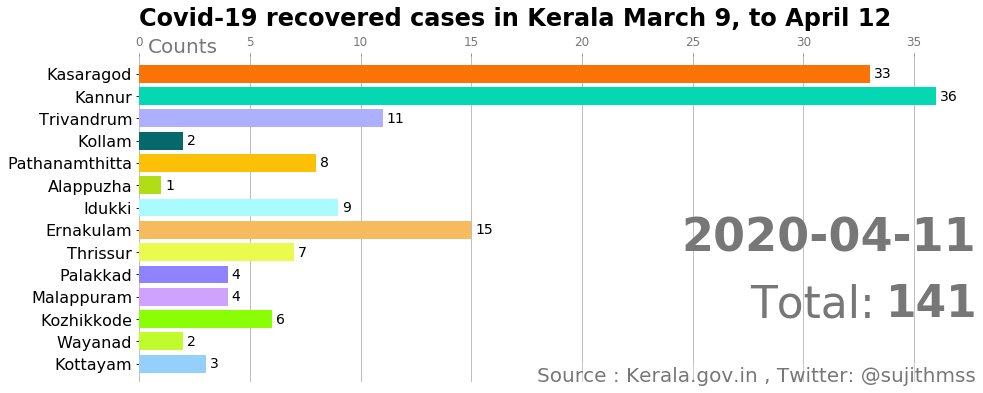

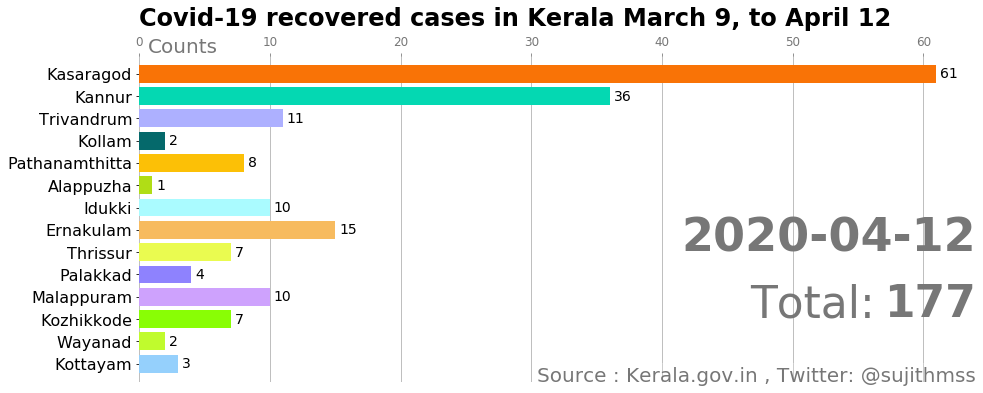

In [9]:
draw_barchart_sum(len(data1.columns)-1, 'Figure_recovered', 'Covid-19 recovered cases in Kerala March 9, to April 12')
# #draw_barchart_sum(1, 'Figure_recovered')

# fig, ax = plt.subplots(figsize=(15, 8))